## 3.6 Decentralized Stochastic Gradient Descent

In previous sections, we have discussed AWC-DGD and ATC-DGD algorithms. In this section, we will discuss their stochastic variants.

### 3.6.1 The stochastic optimization problem

Consider the optimization problem:

$$\min_{x \in \mathbb{R}^d} \quad f(x) = \frac{1}{n}\sum_{i=1}^n [f_i(x) = \mathbb{E}_{\xi_i \sim D_i}\{F(x,\xi_i)\}]$$

where $f_i(x)$ is local to node $i$, and random variable $\xi_i$ denotes the local data that follows distribution $D_i$. Each node $i$ can locally evaluate stochastic gradient $\nabla F(x;\xi_i)$ (not the real gradient $\nabla f_i(x)$); it must communicate to access information from other nodes. Since the real gradient $\nabla f_i(x)$ cannot be accessed, we cannot use ATC-DGD or AWC-DGD introduced in the above sections to solve it. The above stochastic optimization problem is very common in large-scale signal processing, machine learning, and deep learning.

### 3.6.2 Adaptation-then-combination decentralized stochastic gradient descent (ATC-DSGD)

Given the network topology and the weight matrix, the ATC-DSGD will update as follows:

\begin{align}
x_i^{(k+1)} =  \sum_{j=1}^n w_{ij} \Big(x_j^{(k)} - \alpha \nabla F(x_j^{(k)};\xi_j^{(k)}) \Big), \quad  i=1,\cdots,n.
\end{align}

Comparing the above recursion with ATC-DGD, the only difference is to replace the real gradient $\nabla f_i(x)$ with the stochastic gradient $\nabla F(x_i^{(k)};\xi_i^{(k)})$, where $\xi_i^{(k)}$ is a realization of the random variable $\xi_i$ at iteration $k$. 

### 3.6.3 Adaptation-with-combination decentralized stochastic gradient descent (AWC-DSGD)

Given the network topology and the weight matrix, the AWC-DSGD will update as follows:

\begin{align}
x_i^{(k+1)} =  \sum_{j=1}^n w_{ij} x_j^{(k)} - \alpha \nabla F(x_i^{(k)};\xi_i^{(k)}), \quad  i=1,\cdots,n.
\end{align}

Comparing the above recursion with AWC-DGD, the only difference is to replace the real gradient $\nabla f_i(x)$ with the stochastic gradient $\nabla F(x_i^{(k)};\xi_i^{(k)})$. Since AWC-DSGD shares the same algorithm structure with ATC-DSGD, it can be conducted in a non-blocking manner in which the computation and communication steps can be carried out in an independent and parallel manner.

### 3.6.4 Convergence property

#### 3.6.4.1  Convergence of ATC-DSGD

Now we discuss the convergence property of ATC-DSGD and AWC-DSGD. The following assumptions are quite standard in literatures. 

**A.1** Each $f_i(x)$ is $L$-smooth and $\mu$-strongly convex.

**A.2** The random sample  $\xi_i^{(k)}$ is independent of each other for any $k$ and $i$. We also assume each stochastic gradient is unbiased and has bounded variance, i.e., $\mathbb{E}[{\nabla}F(x;\xi_{i})] = \nabla f_i(x)$ and $\mathbb{E}\|{\nabla}F(x;\xi_{i}) - \nabla f_i(x) \|^2 \le  \sigma^2$.

**A.3** The network topology is strongly connected, and the weight matrix $W$ is doubly-stochastic.

With the above assumptions, it is established in \[YAYS-2020\] that 

\begin{align}\label{dsgd-convergence}
\frac{1}{n}\sum_{i=1}^n \mathbb{E}\|x_i^{(k)} - x^\star\|^2 = O\Big( \underbrace{(1-\alpha \mu)^k}_{\rm convg.\ rate} + \underbrace{\frac{\alpha \sigma^2}{n} + \frac{\rho^2 \alpha^2 \sigma^2}{1-\rho}}_{\rm sto.\ bias} + \underbrace{\frac{\rho^2 \alpha^2 b^2}{(1-\rho)^2}}_{\rm inconsis.\ bias} \Big). \hspace{1cm} \mbox{(ATC-DSGD-Convergence)}
\end{align}

where $x^\star$ is the glboal solution to the optimization problem, $\rho = \max\{|\lambda_2(W), \lambda_n(W)|\}$ and $b^2 = \frac{1}{n}\sum_{i=1}^n \|\nabla f_i(x^\star)\|^2$ denotes the data heterogeneity between nodes. Quantity $1-\rho$ measures the connectivity of the network topology. It is observed that AWC-DGD cannot converge exactly to the solution $x^\star$, but to a neighborhood around it. The limiting error is on the order of $O(\frac{\alpha^2 b^2}{(1-\rho)^2})$. When step-size $\alpha$ is small, or the data heterogeneity $b^2$ is small, or the network is well-connected, i.e., $\rho \to 0$, the limiting error can be negligible. 

It is observed from (ATC-DSGD-Convergence) that ATC-DSGD suffers from two sorces of bias: the stochastic gradient bias, and the inconsistency bias. When the real gradient $\nabla f_i(x)$ can be accessed, it holds that $\sigma^2 = 0$ and (ATC-DSGD-Convergence) will reduce to (ATC-DGD-Convergence) in Sec. 3.2. Observating (ATC-DSGD-Convergence), we know that:

- When step-size $\alpha$ is sufficiently small, we have $\lim_{k\to \infty} \frac{1}{n}\sum_{i=1}^n \mathbb{E}\|x_i^{(k)} - x^\star\|^2 = O(\frac{\alpha \sigma^2}{n})$, which is determined by the gradient noise $\sigma^2$.

- When the network is badly-connected such that $\rho \to 0$, we have $\lim_{k\to \infty} \frac{1}{n}\sum_{i=1}^n \mathbb{E}\|x_i^{(k)} - x^\star\|^2 = O(\frac{\alpha^2 b^2}{(1-\rho)^2})$, which is determined by the data heterogeneity $b^2$.

#### 3.6.4.2  Convergence of AWC-DSGD

With the above assumptions, it holds that 

\begin{align}
\frac{1}{n}\sum_{i=1}^n \mathbb{E}\|x_i^{(k)} - x^\star\|^2 = O\Big( \underbrace{(1-\alpha \mu)^k}_{\rm convg.\ rate} + \underbrace{\frac{\alpha \sigma^2}{n} + \frac{\alpha^2 \sigma^2}{1-\rho}}_{\rm sto.\ bias} + \underbrace{\frac{\alpha^2 b^2}{(1-\rho)^2}}_{\rm inconsis.\ bias} \Big). \hspace{1cm} \mbox{(AWC-DSGD-Convergence)}
\end{align}

Comparing (AWC-DSGD-Convergence) and (ATC-DSGD-Convergence), we find ATC-DSGD can achieve a better accuracy when the same step-size and network topology are used for both algorithms becasue $\rho \in (0,1)$. Moreover, AWC-DSGD is less stable than ATC-DSGD, see \[Sayed-2014, Secs.10.6 and 11.5\].

### 3.6.5 Application: Logistic regression for MNIST

In this subsection, we will employ ATC-DSGD to coduct a binary classification task using MNIST dataset. In particular, we will utilize PyTorch to compute the gradient automatically rather than compute the gradient by ourselves. The following experiment has two purposes:

1. To illutrate how DSGD works for distributed optimization

2. To illustrate how to implement DSGD with BlueFog, and how it can be easily correlates with PyTorch AutoGrad.

#### 3.6.5.1 Distributed logistic regression

Consider the following logistic regression problem:

$$\min_{w\in \mathbb{R}^d} \quad \frac{1}{n}\sum_{i=1}^n \mathbb{E}_{y_i,h_i}[\ln(1+\exp(-y_i x_i^T w))] + \frac{\rho}{2}\|w\|^2$$

where $\{x_i, y_i\}$ are local data held in node $i$, $\rho$ is a small positive constant.

#### 3.6.5.1 Test iparallel setup

In [4]:
import ipyparallel as ipp
import numpy as np
import torch
import networkx as nx   # nx will be used for network topology creating and plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
rc = ipp.Client(profile='bluefog')
rc.ids
num_nodes = len(rc.ids)

In [ ]:
%%px
import numpy as np
import bluefog.torch as bf
import torch
from bluefog.common import topology_util
import networkx as nx
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize

bf.init()
print(f"Hello, I am {bf.rank()} among {bf.size()} processes")

In [ ]:
dview = rc[:] # A DirectView of all engines
dview.block=True

# Push the data into all workers
dview.push({'seed': 2021}, block=True)

In [43]:
%%px
print("I received seed as value: ", seed)

[stdout:0] I received seed as value:  2021
[stdout:1] I received seed as value:  2021
[stdout:2] I received seed as value:  2021
[stdout:3] I received seed as value:  2021


Congratulations! Your BlueFog and iParallel is initialized and tested successfully.

#### 3.6.5.2 Prepare data

In [44]:
# Load the MNIST dataset.

from torchvision import datasets

dataset = datasets.MNIST('./data', train=True, download=True)

Since logistic regression is a binary problem we will take a subset of the data that has labels 0 or 1. In addition, because MNIST images are 28 $\times$ 28 images, we will reshape each image to be a vector of size 784. Each image in the MNIST data set is grayscale so an element of a MNIST image ranges from 0 to 255. 

In [45]:
idx = (dataset.targets==0) | (dataset.targets==1)
X = dataset.data[idx].view(dataset.data[idx].shape[0], -1)
y = dataset.targets[idx][:, None]

We will confirm the shape of our new data and label matrix.

In [46]:
print('Feature X has the shape:', X.shape)
print('Label y has the shape:', y.shape)
print('Lable y should only contains labels 0 and 1:', y[:10].t())

Feature X has the shape: torch.Size([12665, 784])
Label y has the shape: torch.Size([12665, 1])
Lable y should only contains labels 0 and 1: tensor([[0, 1, 1, 1, 1, 0, 1, 1, 0, 0]])


We will normalize each image such that each element will range from 0 to 1 instead of 0 to 255.

In [47]:
X = X / 255.

The data $(X,y)$ is ready. We can plot two example images. 

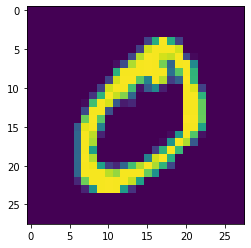

In [48]:
plt.imshow(X[0, :].view(28,28))

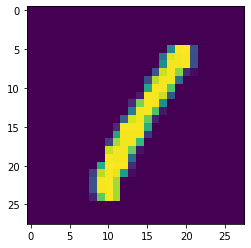

In [49]:
plt.imshow(X[1, :].view(28,28))

Next we partion data and move each partition to the node.

In [58]:
# Move the data to each worker.
M, dim = X.shape
num_split = int(M//num_nodes)
for i in range(num_nodes):
    X_worker = X[i*num_split:(i+1)*num_split]
    y_worker = y[i*num_split:(i+1)*num_split]
    y_worker = torch.squeeze(y_worker)
    y_worker = y_worker.type(torch.FloatTensor)
#     X_worker = X_worker.to(torch.double)
#     y_worker = y_worker.to(torch.double)
    dview.push({'X_worker': X_worker, 'y_worker': y_worker}, targets=i)

Confirm that the data has been moved successfully.

In [51]:
%%px
print(X_worker.shape)
print(y_worker.shape)

[stdout:0] 
torch.Size([3166, 784])
torch.Size([3166])
[stdout:1] 
torch.Size([3166, 784])
torch.Size([3166])
[stdout:2] 
torch.Size([3166, 784])
torch.Size([3166])
[stdout:3] 
torch.Size([3166, 784])
torch.Size([3166])


Each local dataset $(X_i, y_i)$ at worker $i$ is ready.

#### 3.6.5.3 Train the binary classifier with DSGD

In [52]:
%%px

# Implement functions for logistic regression.

def sigmoid(x):
    '''Return the output of the sigmoid function.
    Args:
     - x (torch tensor): Input that we want to apply the sigmoid function on.
    Return:
    - Return a torch tensor of the output 
        
    '''
    return 1.0 / (1.0 + torch.exp(-x))

def obj(w, X, y, reg):
    '''Output of the objective function of logistic regression.
    Args:
     - w (torch tensor): Parameter.
     - X (torch tensor): Data.
     - y (torch tensor): Labels.
     - reg (float): Regularization parameter.
    Return:
     - Returns a float of the value of the objective function.
    '''
    M, _ = X.shape
    
    return -1/M * torch.sum(y[:, None] * X @ w - torch.log(1 + torch.exp(X @ w))) + reg/2 * torch.norm(w, p=2)

def grad(w, X, y, reg):
    '''Output of the gradient for the logistic regression.
    Args:
     - w (torch tensor): Parameter.
     - X_batch (torch tensor): Batch of data gradient is calculated on.
     - y_batch (torch tensor): Labels.
     - reg (float): Regularization parameter.
    Return:
     - Returns a torch tensor that is the gradient for the data and parameters provided.
    '''
    M, _ = X.shape
    return -1/M * (X.T @ y[:, None] - (X.T @ (1 - sigmoid(-X @ w)))) + reg * w

In [53]:
%%px

# Create a distributed gradient descent function that is equivalent to centralized gradient descent.
def distributed_grad_descent(X, y, reg=1e-4, maxite=1000, step_size=1):
    M, dim = X.shape
    w_opt = 0.001 * torch.randn((dim, 1))
    for i in range(maxite):
        # Calculate local gradient.
        grad_iter = grad(w_opt, X, y, reg)
        # Use local gradient to calculate global gradient.
        gradient = bf.allreduce(grad_iter)
        
        # Distributed gradient descent.
        w_opt = w_opt - step_size * gradient
    print(f"[DG] Rank {bf.rank()}: Global Gradient Norm: {torch.norm(gradient, p=2)}")
    return w_opt

In [54]:
%%px

# Adapt then combine using blocking communication.

def ATC(X, y, w_opt, w=None, step_size=1.0, reg=1e-4):
    """
    Adapt then combine algorithm using blocking communication. Performs one iteration.
    Inputs:
    - X (torch tensor) := The data to calculate the loss on of size (N, dim).
    - y (torch tensor) := The corresponding labels of the data of size (N, 1).
    - w_opt (torch tensor) := The optimal parameters.
    - w (torch tensor) := The parameter to update over.
    - step_size (float) := The step size parameter.
    - reg (float) := The regularization parameter.
    - batch_size (int) := Size of a batch for the iteration.
    Output:
    - w (torch tensor) := Update iteration.
    - Relative error of all workers.
    """
    M, dim = X.shape
    
    if w is None:
        w = 0.001 * torch.randn((dim, 1))
    
    adapt = w - step_size * grad(w, X, y, reg)
    combine = bf.neighbor_allreduce(adapt, self_weight, neighbor_weights)
    w = combine

    dist = torch.norm(w - w_opt, p=2)/torch.norm(w_opt, p=2)
    averaged_relative_error = bf.allreduce(dist**2, average=True)
    
    return w, torch.sqrt(averaged_relative_error)

In [55]:
%%px

# Adapt with combine using non-blocking communication.

def AWC(X, y, w_opt, w=None, step_size=1.0, reg=1e-4):
    """
    Adapt with combine algorithm using non-blocking communication. Performs one iteration.
    Inputs:
    - X (torch tensor) := The data to calculate the loss on of size (N, dim).
    - y (torch tensor) := The corresponding labels of the data of size (N, 1).
    - w_opt (torch tensor) := The optimal parameters.
    - w (torch tensor) := The parameter to update over.
    - step_size (float) := The step size parameter.
    - reg (float) := The regularization parameter.
    - batch_size (int) := Size of a batch for the iteration.
    Output:
    - Relative error of all workers.
    """
    M, dim = X.shape
    
    if w is None:
        w = 0.001 * torch.randn((dim, 1))

    
    combine_handle = bf.neighbor_allreduce_nonblocking(w, self_weight, neighbor_weights)
    adapt = step_size * grad(w, X, y, reg)
    combine = bf.wait(combine_handle)
    w = combine - adapt

    dist = torch.norm(w - w_opt, p=2)/torch.norm(w_opt, p=2)
    averaged_relative_error = bf.allreduce(dist**2, average=True)
    
    return w, torch.sqrt(averaged_relative_error)

In [59]:
%%px

# Find the optimal solution.
w_opt_mnist = distributed_grad_descent(X_worker, y_worker, maxite=5000)

KeyboardInterrupt: 

In [37]:
%%px

# loss_step
def ATC_DGD(X, y, rho=1e-2, alpha=1e-3, epoch=50):
    
    n, d = X.shape # n:local data size, d:feature dimension
    w = torch.zeros(d, 1, dtype=torch.double, requires_grad=True)
    
    # Set topology as exponential-two topology.
    G = topology_util.ExponentialTwoGraph(bf.size())
    bf.set_topology(G)
    
    # main recursion
    for _ in range(epoch):
        shuffle_order = torch.randperm(n)
        for order in shuffle_order[:100]:
            
            # sample one data
            i = order.item()
            feature = X[i].reshape(1,-1)
            label = y[i]
    
            # compute grad automatically
            loss_ = torch.mean(torch.log(1 + torch.exp(-label*feature.mm(w)))) + 0.5*rho*torch.norm(w, p=2)
            loss_.backward()
        
            # ATC-DGD
            with torch.no_grad():
                w.data = bf.neighbor_allreduce(w.data - alpha * w.grad.data)
                w.grad.data.zero_()
    
    return w

In [38]:
%%px

w = ATC_DGD(X_worker, y_worker, rho=1e-2, alpha=1e-3, epoch=5)

In [23]:
1+1

2

Find the optimal result using the distributed gradient descent function developed before. 

In [17]:


print(w_opt_mnist)

[stdout:0] 
[DG] Rank 0: Global Gradient Norm: 0.00021530537924263626
tensor([[-4.1454e-04],
        [ 1.5268e-03],
        [ 2.2789e-03],
        [-5.2180e-04],
        [-2.4208e-04],
        [-8.2633e-04],
        [-1.1322e-04],
        [-2.4679e-04],
        [-4.1106e-04],
        [ 3.2596e-04],
        [-4.6936e-04],
        [ 6.6684e-05],
        [-5.1959e-04],
        [ 1.7390e-04],
        [-4.0965e-04],
        [-1.1527e-03],
        [-1.3719e-03],
        [ 6.6315e-04],
        [-4.6811e-05],
        [-4.3492e-04],
        [ 7.3475e-05],
        [ 1.5381e-03],
        [-3.8010e-04],
        [-6.2565e-04],
        [ 6.3816e-04],
        [-1.5623e-03],
        [-3.8932e-04],
        [-1.4504e-03],
        [-9.6471e-05],
        [ 7.3598e-04],
        [ 2.3206e-03],
        [-9.5610e-04],
        [ 4.7032e-04],
        [-8.5588e-04],
        [-1.2766e-03],
        [-1.1936e-03],
        [ 8.5900e-04],
        [-2.3481e-06],
        [ 1.3068e-03],
        [ 1.3673e-03],
        [-

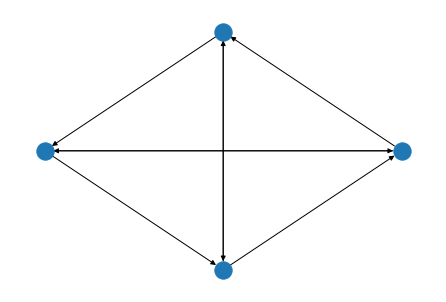

In [19]:
# Generate topology.

# Plot figure
%px G = topology_util.ExponentialTwoGraph(bf.size())

G_0 = dview.pull('G', block=True, targets=0)
nx.draw_circular(G_0)

Run the Adapt-Then-Combine Algorithm.

In [20]:
%%px

# Set topology as exponential-2 graph.
bf.set_topology(G)
topology = bf.load_topology()
self_weight, neighbor_weights = topology_util.GetRecvWeights(topology, bf.rank())

In [21]:
%%px
# Print weights.

if bf.rank() == 0:
    print('self weights: {}\n'.format(self_weight))
    print('neighbor weights:')
    for k, v in neighbor_weights.items():
        print(k, v)

[stdout:0] 
self weights: 0.3333333333333333

neighbor weights:
2 0.3333333333333333
3 0.3333333333333333


In [22]:
# Run the Adapt-Then-Combine Algorithm

maxite = 1000
relative_error = torch.zeros((maxite, 1))
%px w = None
for ite in range(maxite):
    
    if ite%100 == 0:
        print('Progress {}/{}'.format(ite, maxite))
    
    %px w, relative_error_ite = ATC(subset_data, subset_targets, w_opt_mnist, step_size=1, w=w)
    relative_error[ite] = dview.pull('relative_error_ite', block=True, targets=0)

Progress 0/1000
Progress 100/1000
Progress 200/1000
Progress 300/1000
Progress 400/1000
Progress 500/1000
Progress 600/1000
Progress 700/1000
Progress 800/1000
Progress 900/1000


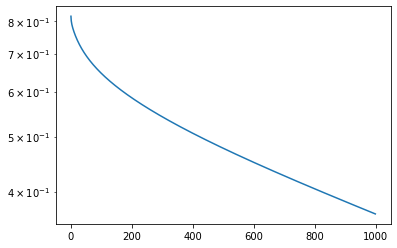

In [23]:
plt.semilogy(relative_error)

In [24]:
# Run the Adapt-With-Combine Algorithm

maxite = 1000
relative_error = torch.zeros((maxite, 1))
%px w = None
for ite in range(maxite):
    
    if ite%100 == 0:
        print('Progress {}/{}'.format(ite, maxite))
    
    %px w, relative_error_ite = AWC(subset_data, subset_targets, w_opt_mnist, step_size=1, w=w)
    relative_error[ite] = dview.pull('relative_error_ite', block=True, targets=0)

Progress 0/1000
Progress 100/1000
Progress 200/1000
Progress 300/1000
Progress 400/1000
Progress 500/1000
Progress 600/1000
Progress 700/1000
Progress 800/1000
Progress 900/1000


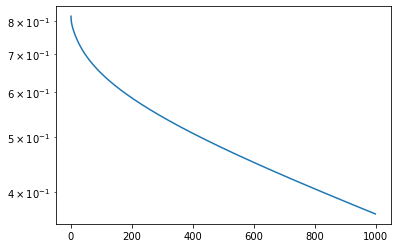

In [25]:
plt.semilogy(relative_error)

For our plots, we used relative error which is the L2-norm of the difference between the current set of parameters and the optimal set of parameters divided by the L2-norm of the optimal set of parameters.